# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

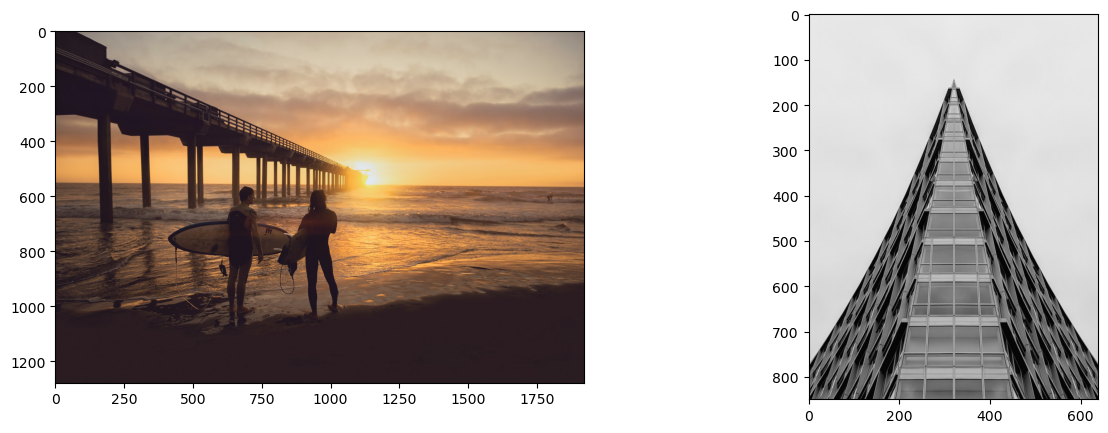

In [2]:
f, axarr = plt.subplots(1,2)
img_1 = cv2.imread('./data/surf.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

img_2 = cv2.imread('./data/building.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

images = [img_1, img_2]
axarr[0].imshow(images[0])
axarr[1].imshow(images[1])

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [3]:
def balance_white(img, row, col):
    # Define white patch and the coefficients
    white = img[row, col, :]
    coeffs = 255.0/white

    # Apply white balancing and generate balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * coeffs[channel]

    # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = balanced/255
    balanced[balanced > 1] = 1

    plt.subplot(121), plt.imshow(img)
    plt.subplot(122), plt.imshow(balanced)

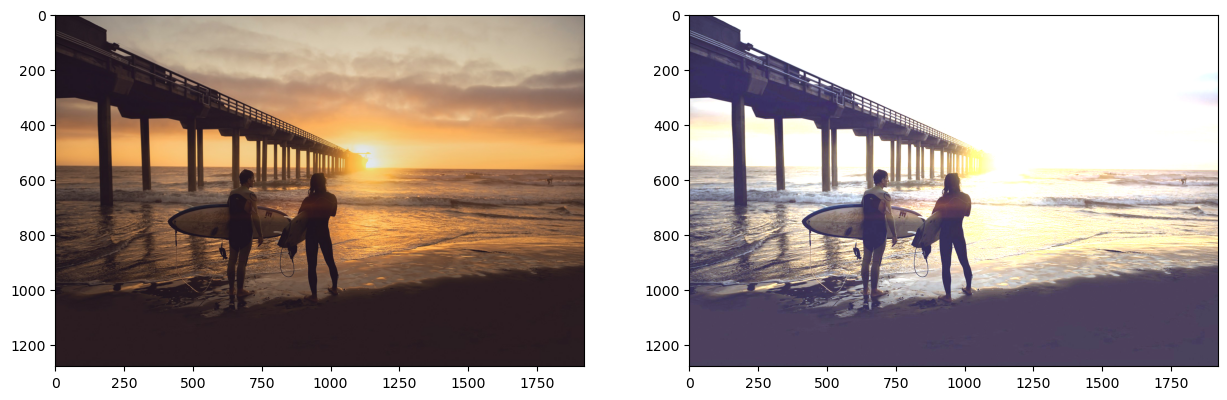

In [4]:
balance_white(images[0], 934, 737)

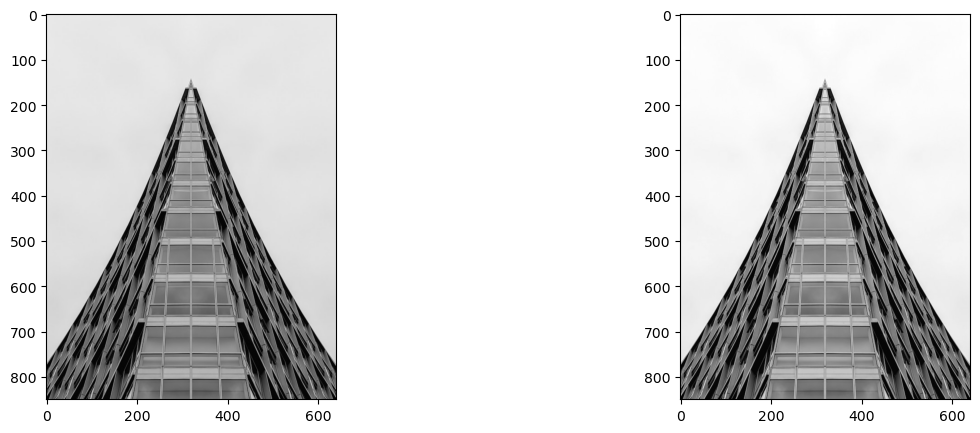

In [5]:
balance_white(images[1], 9, 1)

### Gray world
This algorithm assumes that a scene, on average, is gray.

In [6]:
def balance_gray(img):
    # Compute the mean values for all three colour channels (red, green, blue)
    red, green, blue = cv2.split(img)
    mean_r = np.mean(red)
    mean_g = np.mean(green)
    mean_b = np.mean(blue)
    print(mean_r, mean_g, mean_b)

    # Compute the coefficients kr, kg, kb
    # Note: there are 3 coefficients to compute but we only have 2 equations.
    # Therefore, you have to make an assumption, fix the value of one of the
    # coefficients and compute the remining two
    # Hint: You can fix the coefficient of the brightest colour channel to 1.
    kr = 1.
    kg = mean_r / mean_g
    kb = mean_r / mean_b

    # # Apply color balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)

    for channel in range(3):
        balanced[..., channel] = img[..., channel] * [kr, kg, kb][channel]

    balanced = balanced / 255
    balanced[balanced > 1] = 1

    # Show the original and the balanced image side by side
    plt.subplot(121), plt.imshow(img)
    plt.subplot(122), plt.imshow(balanced)

126.4801993675013 97.75047478155973 76.87945031298905


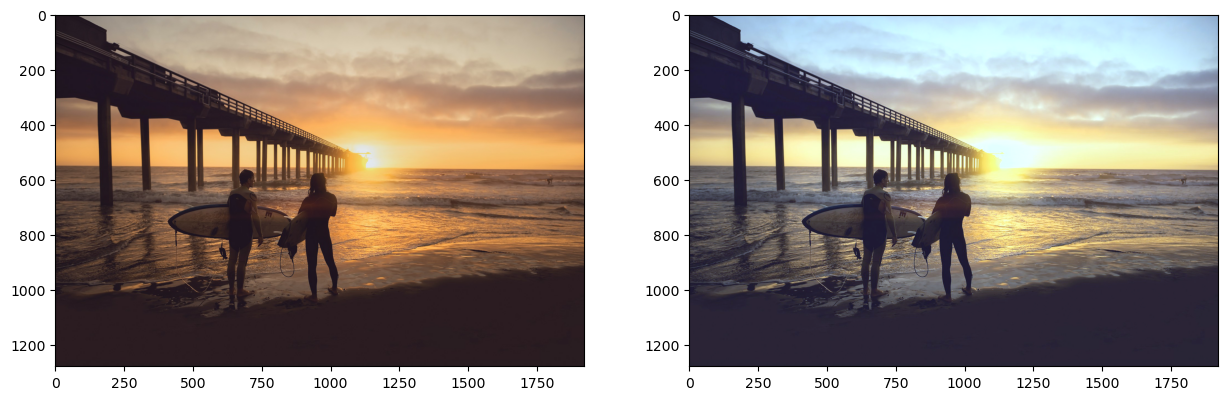

In [7]:
balance_gray(images[0])

171.46770220588235 171.46770220588235 171.46770220588235


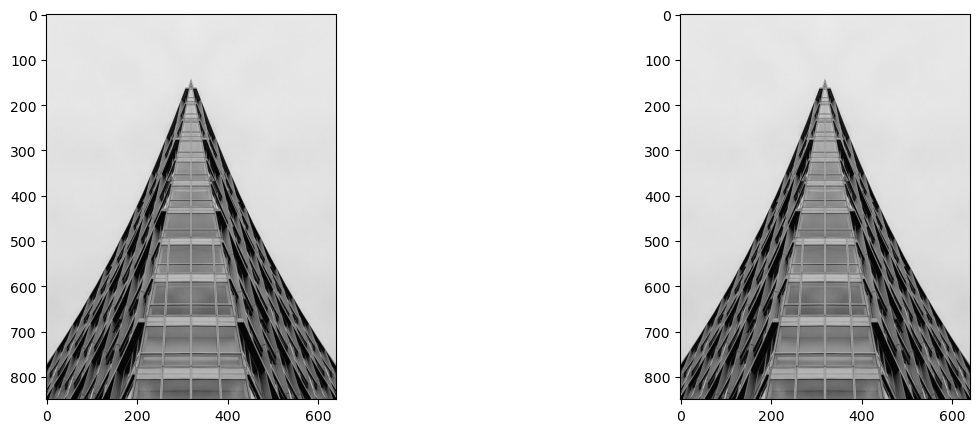

In [8]:
balance_gray(images[1])

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

In [9]:

def balance_max(img):
    red, green, blue = cv2.split(img)
    # Compute the maximum values for all three colour channels (red, green, blue)
    max_r = img[:, :, 0].max()
    max_g = img[:, :, 1].max()
    max_b = img[:, :, 2].max()

    # Apply scale-by-max balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * (255.0 / [max_r, max_g, max_b][channel])

    balanced = balanced / 255
    balanced[balanced > 1] = 1

    plt.subplot(121), plt.imshow(img)
    plt.subplot(122), plt.imshow(balanced)

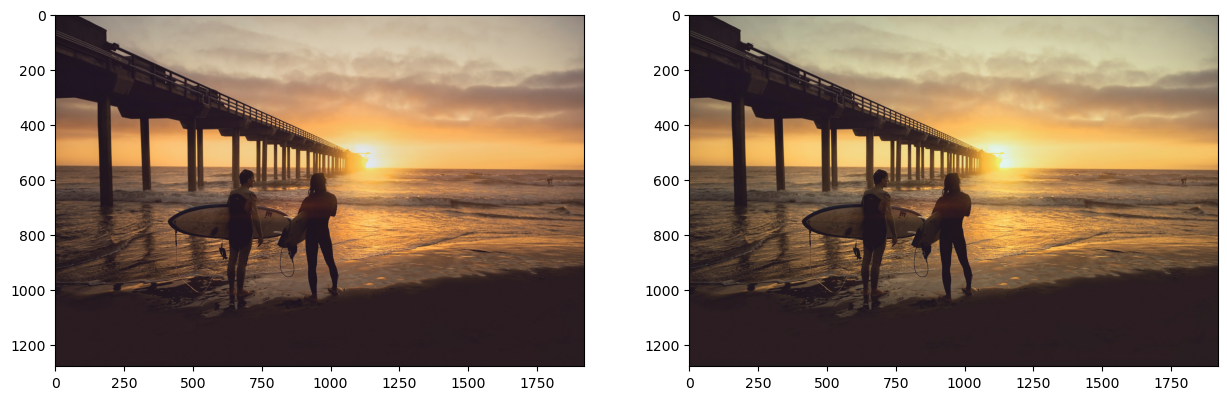

In [10]:
balance_max(images[0])

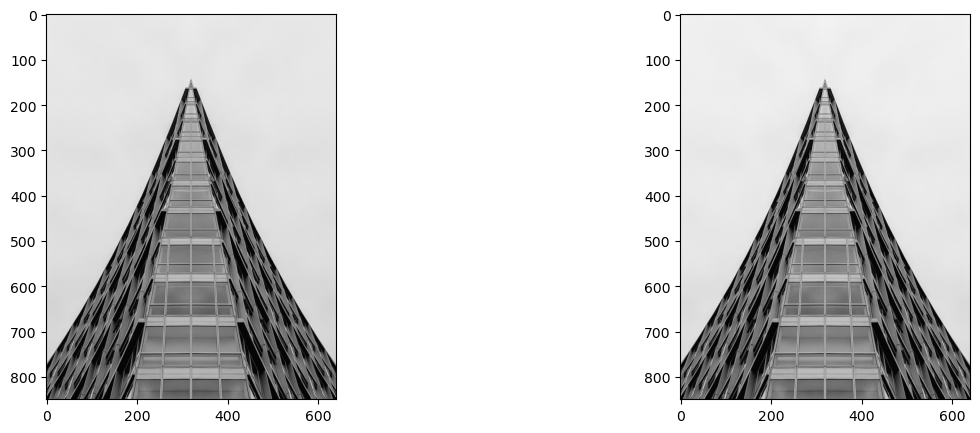

In [11]:
balance_max(images[1])